# **Installing Libraries**


In [15]:
!pip install opencv-python opencv-python-headless torch torchvision matplotlib librosa
!pip install pydub
!pip install tensorflow
!pip install gtts librosa tensorflow
!pip install Moviepy


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at e:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [44]:
import cv2
import matplotlib.pyplot as plt

# Load the Haar Cascade file for animal detection
cascade_path = 'C:/Users/abbas/Desktop/AI-CCP/haarcascade_frontalcatface.xml'
animal_cascade = cv2.CascadeClassifier(cascade_path)


# **Haar Feature Detection**

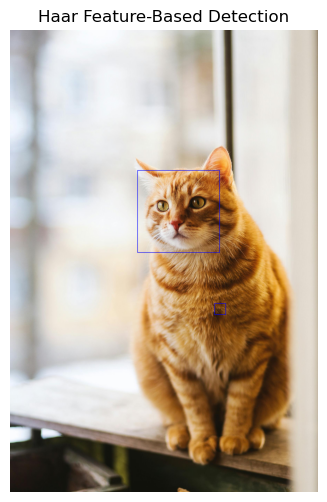

In [45]:



def detect_animals(image_path):
    # Check if the classifier loaded properly
    if animal_cascade.empty():
        print("Error loading Haar Cascade classifier. Check the file path.")
        return
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Could not read the image. Check the image path.")
        return

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect animals (cats) in the image
    animals = animal_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangles around detected animals
    for (x, y, w, h) in animals:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    return image

# Example usage
image_path = r'C:\Users\abbas\Desktop\AI-CCP\Animal.jpg'
haar_image = detect_animals(image_path)

# Display the image with detected animals
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(haar_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Haar Feature-Based Detection')
plt.show()


In [46]:
import cv2

def detect_animals_in_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        animals = animal_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in animals:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        cv2.imshow('Animal Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Example usage
detect_animals_in_video(r'C:\Users\abbas\Desktop\AI-CCP\Video1.mp4')


KeyboardInterrupt: 

# **Installing Packages**

In [36]:
import requests

# URLs of the files to download
urls = [
    ("https://pjreddie.com/media/files/yolov3.weights", "yolov3.weights"),
    ("https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg", "yolov3.cfg"),
    ("https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names", "coco.names")
]

# Download each file
for url, filename in urls:
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download {filename}")


Downloaded yolov3.weights
Downloaded yolov3.cfg
Downloaded coco.names


# **YOLO**

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load YOLOv3 network
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

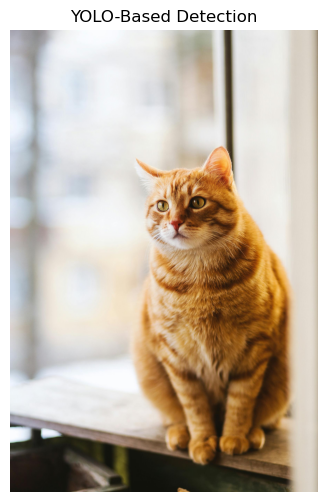

In [50]:
# def detect_objects_yolo(image_path):
#     image = cv2.imread(image_path)
#     height, width, channels = image.shape

#     blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
#     net.setInput(blob)
#     outs = net.forward(output_layers)

#     class_ids = []
#     confidences = []
#     boxes = []
#     for out in outs:
#         for detection in out:
#             scores = detection[5:]
#             class_id = np.argmax(scores)
#             confidence = scores[class_id]
#             if confidence > 0.5:
#                 center_x = int(detection[0] * width)
#                 center_y = int(detection[1] * height)
#                 w = int(detection[2] * width)
#                 h = int(detection[3] * height)

#                 x = int(center_x - w / 2)
#                 y = int(center_y - h / 2)

#                 boxes.append([x, y, w, h])
#                 confidences.append(float(confidence))
#                 class_ids.append(class_id)

#     indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#     for i in range(len(boxes)):
#         if i in indexes:
#             x, y, w, h = boxes[i]
#             label = str(classes[class_ids[i]])
#             color = (0, 255, 0)
#             cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
#             cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

#     # Convert image from BGR to RGB for displaying with matplotlib
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     # Display image using matplotlib
#     plt.figure(figsize=(10, 6))
#     plt.imshow(image_rgb)
#     plt.axis('off')
#     plt.show()

# # Example usage
# detect_objects_yolo(r'C:\Users\abbas\Desktop\AI-CCP\Dog-Cat.jpg')

def detect_objects_yolo(image_path):
    image = cv2.imread(image_path)
    height, width, channels = image.shape

    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = (0, 255, 0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    return image

# Example usage
yolo_image = detect_objects_yolo(image_path)

# Display the image with detected objects
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(yolo_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('YOLO-Based Detection')
plt.show()


In [163]:
# import cv2
# import numpy as np

# # Load YOLO
# net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
# layer_names = net.getLayerNames()
# output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# # Load class labels
# with open("coco.names", "r") as f:
#     classes = [line.strip() for line in f.readlines()]

# def detect_objects_yolo_video(video_path):
#     cap = cv2.VideoCapture(video_path)

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         height, width, channels = frame.shape

#         blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
#         net.setInput(blob)
#         outs = net.forward(output_layers)

#         class_ids = []
#         confidences = []
#         boxes = []
#         for out in outs:
#             for detection in out:
#                 scores = detection[5:]
#                 class_id = np.argmax(scores)
#                 confidence = scores[class_id]
#                 if confidence > 0.5:
#                     center_x = int(detection[0] * width)
#                     center_y = int(detection[1] * height)
#                     w = int(detection[2] * width)
#                     h = int(detection[3] * height)

#                     x = int(center_x - w / 2)
#                     y = int(center_y - h / 2)

#                     boxes.append([x, y, w, h])
#                     confidences.append(float(confidence))
#                     class_ids.append(class_id)

#         indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#         for i in range(len(boxes)):
#             if i in indexes:
#                 x, y, w, h = boxes[i]
#                 label = str(classes[class_ids[i]])
#                 color = (0, 255, 0)
#                 cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
#                 cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

#         cv2.imshow('Object Detection', frame)
        
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()

# # Example usage
# detect_objects_yolo_video('C:/Users/abbas/Desktop/AI-CCP/Video.mp4')


In [1]:
# import cv2
# import torch
# import numpy as np
# import matplotlib.pyplot as plt
# from ultralytics import YOLO
# from pydub import AudioSegment
# import tensorflow as tf
# import librosa
# import networkx as nx
# from moviepy.editor import VideoFileClip
# from sklearn.preprocessing import LabelEncoder
# from tf_keras.models import Sequential
# from tf_keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
from ultralytics import YOLO
from pydub import AudioSegment
import tensorflow as tf
import librosa
from moviepy.editor import VideoFileClip
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with the appropriate model file

# Function to detect objects in an image
def detect_objects(image, conf_thresh=0.4, iou_thresh=0.4):
    results = model(image)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    conf = results[0].boxes.conf.cpu().numpy()
    cls = results[0].boxes.cls.cpu().numpy()
    filtered_boxes = np.column_stack((boxes, conf, cls))
    filtered_boxes = filtered_boxes[filtered_boxes[:, 4] > conf_thresh]
    
    x1, y1, x2, y2, conf, cls = filtered_boxes[:, 0], filtered_boxes[:, 1], filtered_boxes[:, 2], filtered_boxes[:, 3], filtered_boxes[:, 4], filtered_boxes[:, 5]
    bboxes = np.column_stack((x1, y1, x2-x1, y2-y1)).tolist()
    scores = conf.tolist()
    indices = cv2.dnn.NMSBoxes(bboxes, scores, conf_thresh, iou_thresh)
    
    if len(indices) > 0:
        indices = indices.flatten()
        return filtered_boxes[indices]
    else:
        return np.array([])

# Function to plot bounding boxes on the image
def plot_boxes(image, boxes, class_names):
    for box in boxes:
        x1, y1, x2, y2, conf, class_id = box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        label = f"{class_names[int(class_id)]}: {conf:.2f}"
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image
# Load a video file
video_path = 'C:/Users/abbas/Desktop/AI-CCP/Video.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError("Video not found or path is incorrect")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    boxes = detect_objects(original_frame)
    class_names = model.names
    output_frame = plot_boxes(original_frame, boxes, class_names)
    output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)
    cv2.imshow('Wildlife Monitoring', output_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

C:\Users\abbas\AppData\Roaming\Python\Python311\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


: 

: 

: 

# Comparison Between Haar Detection And YOLO Detection

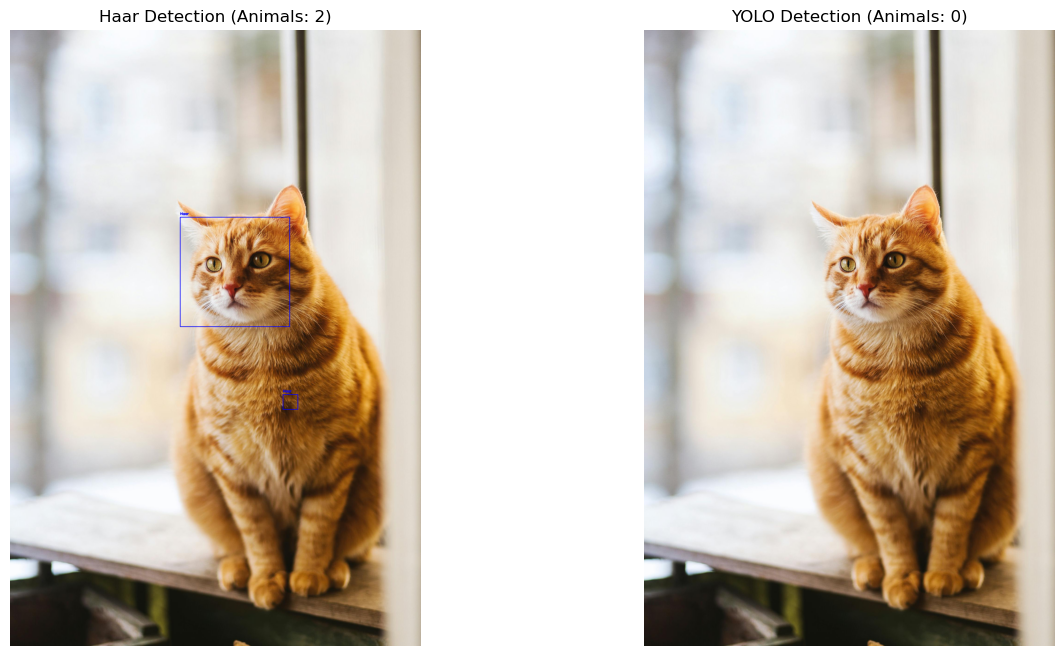

Haar Detection detected more animals.


(2, 0)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Load YOLOv3 network
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load the Haar Cascade classifier for animal detection
animal_cascade = cv2.CascadeClassifier(r'C:\Users\abbas\Desktop\AI-CCP\haarcascade_frontalcatface.xml')

# Function to detect animals using Haar
def detect_animals_haar(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    animals = animal_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)
    return animals

# Function to detect objects using YOLO
def detect_objects_yolo(image):
    height, width, channels = image.shape
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    class_ids, confidences, boxes = [], [], []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    final_boxes = [boxes[i] for i in indexes]
    return final_boxes

# Function to evaluate and display performance
def evaluate_performance(image_path):
    image = cv2.imread(image_path)
    
    # Haar Detection
    haar_boxes = detect_animals_haar(image)
    
    # YOLO Detection
    yolo_boxes = detect_objects_yolo(image)
    
    # Draw rectangles on image for visualization
    haar_image = image.copy()
    for (x, y, w, h) in haar_boxes:
        cv2.rectangle(haar_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(haar_image, 'Haar', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
    yolo_image = image.copy()
    for (x, y, w, h) in yolo_boxes:
        cv2.rectangle(yolo_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(yolo_image, 'YOLO', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Display images side by side
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))
    
    axs[0].imshow(cv2.cvtColor(haar_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title(f'Haar Detection (Animals: {len(haar_boxes)})')
    axs[0].axis('off')
    
    axs[1].imshow(cv2.cvtColor(yolo_image, cv2.COLOR_BGR2RGB))
    axs[1].set_title(f'YOLO Detection (Animals: {len(yolo_boxes)})')
    axs[1].axis('off')
    
    plt.show()
    
    # Compare based on number of animals detected
    if len(haar_boxes) > len(yolo_boxes):
        print("Haar Detection detected more animals.")
    elif len(yolo_boxes) > len(haar_boxes):
        print("YOLO Detection detected more animals.")
    else:
        print("Both methods detected the same number of animals.")
    
    return len(haar_boxes), len(yolo_boxes)

#   ------------------------------------------------------------------------
#     # Function to evaluate and display performance
# def evaluate_performance(image_path):
#     image = cv2.imread(image_path)
    
#     # Haar Detection
#     start_time = time.time()
#     haar_boxes = detect_animals_haar(image)
#     haar_time = time.time() - start_time
    
#     # YOLO Detection
#     start_time = time.time()
#     yolo_boxes = detect_objects_yolo(image)
#     yolo_time = time.time() - start_time
    
    # Draw rectangles on image for visualization
#     haar_image = image.copy()
#     for (x, y, w, h) in haar_boxes:
#         cv2.rectangle(haar_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
#         cv2.putText(haar_image, 'Haar', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    
#     yolo_image = image.copy()
#     for (x, y, w, h) in yolo_boxes:
#         cv2.rectangle(yolo_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         cv2.putText(yolo_image, 'YOLO', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
#     # Display images side by side
#     fig, axs = plt.subplots(1, 2, figsize=(15, 8))
    
#     axs[0].imshow(cv2.cvtColor(haar_image, cv2.COLOR_BGR2RGB))
#     axs[0].set_title(f'Haar Detection (Time: {haar_time:.2f}s, Animals: {len(haar_boxes)})')
#     axs[0].axis('off')
    
    # axs[1].imshow(cv2.cvtColor(yolo_image, cv2.COLOR_BGR2RGB))
    # axs[1].set_title(f'YOLO Detection (Time: {yolo_time:.2f}s, Animals: {len(yolo_boxes)})')
    # axs[1].axis('off')
    
    # plt.show()

    # # Compare based on number of animals detected and processing time
    # if len(haar_boxes) > len(yolo_boxes):
    #     print("Haar Detection detected more animals.")
    # elif len(yolo_boxes) > len(haar_boxes):
    #     print("YOLO Detection detected more animals.")
    # else:
    #     print("Both methods detected the same number of animals.")
    
    # if haar_time < yolo_time:
    #     print("Haar Detection was faster.")
    # elif yolo_time < haar_time:
    #     print("YOLO Detection was faster.")
    # else:
    #     print("Both methods took the same amount of time.")
    
    # return haar_time, yolo_time
    
# ------------------------------------
 

# Example usage
image_path = r'C:\Users\abbas\Desktop\AI-CCP\Animal.jpg'
evaluate_performance(image_path)


# Sound Analysis

In [1]:
import os
import librosa
import numpy as np
from gtts import gTTS
from moviepy.editor import VideoFileClip
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf

# Step 1: Generate Synthetic Audio Data for Different Moods
def create_synthetic_audio(mood, text, filename):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)

os.makedirs('synthetic_audio', exist_ok=True)

moods = ['normal', 'angry']
texts = {
    'normal': [
        'This is a normal bird',
        'This is a normal cat',
        'This is a normal dog',
        'This is a normal horse',
        'This is a normal sheep',
        'This is a normal cow',
        'This is a normal elephant',
        'This is a normal bear',
        'This is a normal zebra',
        'This is a normal giraffe'
    ],
    'angry': [
        'This is an angry bird',
        'This is an angry cat',
        'This is an angry dog',
        'This is an angry horse',
        'This is an angry sheep',
        'This is an angry cow',
        'This is an angry elephant',
        'This is an angry bear',
        'This is an angry zebra',
        'This is an angry giraffe'
    ]
}

for mood in moods:
    for i, text in enumerate(texts[mood]):
        create_synthetic_audio(mood, text, f'synthetic_audio/{mood}_{i}.wav')

In [38]:
# Step 2: Extract Features from Audio
def extract_features(file_name, max_len=200):
    y, sr = librosa.load(file_name, sr=None)
    y = librosa.util.normalize(y)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs = (mfccs - np.mean(mfccs, axis=1, keepdims=True)) / np.std(mfccs, axis=1, keepdims=True)
    if mfccs.shape[1] > max_len:
        mfccs = mfccs[:, :max_len]
    else:
        mfccs = np.pad(mfccs, ((0, 0), (0, max_len - mfccs.shape[1])), mode='constant')
    return mfccs

def load_data(data_dir, max_len=200):
    features = []
    labels = []
    for file_name in os.listdir(data_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(data_dir, file_name)
            label = moods.index(file_name.split('_')[0])  # Assign a label based on the mood
            mfccs = extract_features(file_path, max_len=max_len)
            features.append(mfccs)
            labels.append(label)
    return np.array(features), np.array(labels)

data_dir = 'C:/Users/abbas/Desktop/AI-CCP/synthetic_audio'
X, y = load_data(data_dir)


In [39]:
# Step 3: Prepare Data for Model Input
X_padded = np.expand_dims(X, axis=-1)  # Add a channel dimension


In [40]:
# Step 4: Define and Train the Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_padded.shape[1], X_padded.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(moods), activation='softmax')  # Number of classes corresponds to the number of moods
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_padded, y, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6970 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 46ms/step - loss: 0.4465 - accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 41ms/step - loss: 0.5503 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 0.1245 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 49ms/step - loss: 0.0479 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 50ms/step - loss: 0.0738 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 56ms/step - loss: 0.0618 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 48ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 52ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 48ms/step - loss: 0.0031 - accuracy: 1.0000


In [41]:
# Step 5: Evaluate and Save the Model
loss, accuracy = model.evaluate(X_padded, y)
print(f'Accuracy: {accuracy * 100:.2f}%')
model.save('animal_mood_classifier.h5')


1/1 [==============================] - 0s 424ms/step - loss: 0.0013 - accuracy: 1.0000
Accuracy: 100.00%


In [42]:
# Step 6: Extract Audio from Video and Predict Mood
def extract_audio_from_video(video_file, output_audio_file):
    video = VideoFileClip(video_file)
    video.audio.write_audiofile(output_audio_file)

def predict_mood(file_name, max_len=200):
    mfccs = extract_features(file_name, max_len=max_len)
    mfccs_padded = np.expand_dims(mfccs, axis=0)  # Add batch dimension
    mfccs_padded = np.expand_dims(mfccs_padded, axis=-1)  # Add channel dimension
    prediction = model.predict(mfccs_padded)
    predicted_mood = moods[np.argmax(prediction)]
    return predicted_mood


# Example usage
video_file = 'C:/Users/abbas/Desktop/AI-CCP/Angry-Dog1.mp4'  # Replace with your video file path
output_audio_file = 'C:/Users/abbas/Desktop/AI-CCP/extracted_audio.wav'
extract_audio_from_video(video_file, output_audio_file)
predicted_mood = predict_mood(output_audio_file)
print(f'The predicted mood is: {predicted_mood}')

MoviePy - Writing audio in C:/Users/abbas/Desktop/AI-CCP/extracted_audio.wav


MoviePy - Done.


1/1 [==============================] - 0s 135ms/step
The predicted mood is: normal


# Video with mood

In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
from moviepy.editor import VideoFileClip

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with the appropriate model file

# Function to detect objects in an image
def detect_objects(image, conf_thresh=0.4, iou_thresh=0.4):
    results = model(image)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    conf = results[0].boxes.conf.cpu().numpy()
    cls = results[0].boxes.cls.cpu().numpy()
    filtered_boxes = np.column_stack((boxes, conf, cls))
    filtered_boxes = filtered_boxes[filtered_boxes[:, 4] > conf_thresh]
    
    x1, y1, x2, y2, conf, cls = filtered_boxes[:, 0], filtered_boxes[:, 1], filtered_boxes[:, 2], filtered_boxes[:, 3], filtered_boxes[:, 4], filtered_boxes[:, 5]
    bboxes = np.column_stack((x1, y1, x2-x1, y2-y1)).tolist()
    scores = conf.tolist()
    indices = cv2.dnn.NMSBoxes(bboxes, scores, conf_thresh, iou_thresh)
    
    if len(indices) > 0:
        indices = indices.flatten()
        return filtered_boxes[indices]
    else:
        return np.array([])

# Function to plot bounding boxes on the image
def plot_boxes(image, boxes, class_names):
    for box in boxes:
        x1, y1, x2, y2, conf, class_id = box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        label = f"{class_names[int(class_id)]}: {conf:.2f}"
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

# Function to extract audio from video and predict mood
def extract_audio_from_video(video_file, output_audio_file):
    video = VideoFileClip(video_file)
    video.audio.write_audiofile(output_audio_file)

def predict_mood(file_name, max_len=200):
    mfccs = extract_features(file_name, max_len=max_len)
    mfccs_padded = np.expand_dims(mfccs, axis=0)  # Add batch dimension
    mfccs_padded = np.expand_dims(mfccs_padded, axis=-1)  # Add channel dimension
    prediction = model.predict(mfccs_padded)
    predicted_mood = moods[np.argmax(prediction)]
    return predicted_mood

# Example usage to extract audio and predict mood
video_file = 'C:/Users/abbas/Desktop/AI-CCP/Elephant-Angry.mp4'  # Replace with your video file path
output_audio_file = 'C:/Users/abbas/Desktop/AI-CCP/extracted_audio.wav'
extract_audio_from_video(video_file, output_audio_file)
predicted_mood = predict_mood(output_audio_file)

# Load a video file
video_path = 'C:/Users/abbas/Desktop/AI-CCP/Video.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)


: 

: 

: 

In [ ]:
if not cap.isOpened():
    raise ValueError("Video not found or path is incorrect")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    boxes = detect_objects(original_frame)
    class_names = model.names
    output_frame = plot_boxes(original_frame, boxes, class_names)
    output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)

    # Display the mood on the output window
    mood_text = f"Mood: {predicted_mood}"
    cv2.putText(output_frame, mood_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow('Wildlife Monitoring', output_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [179]:
# import cv2
# import numpy as np
# import librosa
# from sklearn.svm import SVC
# from sklearn.exceptions import NotFittedError
# from sklearn.utils.validation import check_is_fitted

# # Load YOLO
# net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
# layer_names = net.getLayerNames()
# output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# # Load class labels
# with open("coco.names", "r") as f:
#     classes = [line.strip() for line in f.readlines()]

# # Function to extract MFCC features from audio file
# def extract_mfcc(audio_path):
#     y, sr = librosa.load(audio_path, sr=None)
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
#     mfccs_mean = np.mean(mfccs.T, axis=0)
#     return mfccs_mean

# # Example SVM classifier initialization
# svm_classifier = SVC(kernel='linear')

# # Function to perform YOLO detection on a frame
# def detect_objects_yolo(frame):
#     height, width, channels = frame.shape

#     blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
#     net.setInput(blob)
#     outs = net.forward(output_layers)

#     class_ids = []
#     confidences = []
#     boxes = []
#     for out in outs:
#         for detection in out:
#             scores = detection[5:]
#             class_id = np.argmax(scores)
#             confidence = scores[class_id]
#             if confidence > 0.5:
#                 center_x = int(detection[0] * width)
#                 center_y = int(detection[1] * height)
#                 w = int(detection[2] * width)
#                 h = int(detection[3] * height)

#                 x = int(center_x - w / 2)
#                 y = int(center_y - h / 2)

#                 boxes.append([x, y, w, h])
#                 confidences.append(float(confidence))
#                 class_ids.append(class_id)

#     indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

#     for i in range(len(boxes)):
#         if i in indexes:
#             x, y, w, h = boxes[i]
#             label = str(classes[class_ids[i]])
#             color = (0, 255, 0)
#             cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
#             cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

#     return frame

# # Function to detect objects and overlay mood on video
# def detect_objects_and_mood(video_path, audio_path):
#     cap = cv2.VideoCapture(video_path)
#     audio_features = extract_mfcc(audio_path)

#     # Check if SVM classifier is fitted
#     try:
#         check_is_fitted(svm_classifier)
#     except NotFittedError:
#         # Fit SVM classifier with dummy data if not fitted
#         X_train = np.random.rand(100, 13)  # Replace with your actual features
#         y_train = np.random.choice(['angry', 'normal'], size=100)  # Replace with your actual labels
#         svm_classifier.fit(X_train, y_train)

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
#         frame = detect_objects_yolo(frame)
#         try:
#             predicted_mood = svm_classifier.predict([audio_features])[0]
#         except NotFittedError:
#             print("SVM classifier is not fitted. Please fit the classifier before prediction.")
#             break
#         cv2.putText(frame, f"Mood: {predicted_mood}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
#         cv2.imshow('Object Detection and Mood Overlay', frame)
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#     cap.release()
#     cv2.destroyAllWindows()

# # Example usage
# detect_objects_and_mood('Angry-Dog1.mp4', 'extracted_audio.wav')


# Graph Based Movement Tracking

In [146]:
# import cv2
# import numpy as np
# import math
# import librosa
# import random

# # Load YOLO
# net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
# layer_names = net.getLayerNames()
# output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# # Load class labels
# with open("coco.names", "r") as f:
#     classes = [line.strip() for line in f.readlines()]

# # Graph implementation using adjacency list
# class Graph:
#     def __init__(self):
#         self.graph = {}

#     def add_edge(self, u, v):
#         if u not in self.graph:
#             self.graph[u] = []
#         if v not in self.graph:
#             self.graph[v] = []
#         self.graph[u].append(v)
#         self.graph[v].append(u)

#     def bfs(self, start):
#         visited = set()
#         queue = [start]
#         visited.add(start)

#         while queue:
#             vertex = queue.pop(0)
#             print(vertex, end=" ")

#             for neighbor in self.graph[vertex]:
#                 if neighbor not in visited:
#                     queue.append(neighbor)
#                     visited.add(neighbor)
#         print()

#     def dfs(self, start, visited=None):
#         if visited is None:
#             visited = set()
#         visited.add(start)
#         print(start, end=" ")

#         for neighbor in self.graph[start]:
#             if neighbor not in visited:
#                 self.dfs(neighbor, visited)
#         print()


# def get_animal_positions(frame, net, output_layers, classes):
#     height, width, _ = frame.shape
#     blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
#     net.setInput(blob)
#     outs = net.forward(output_layers)

#     positions = []
#     max_confidence = 0
#     best_detection = None
#     for out in outs:
#         for detection in out:
#             scores = detection[5:]
#             class_id = np.argmax(scores)
#             confidence = scores[class_id]
#             if confidence > 0.5:
#                 center_x = int(detection[0] * width)
#                 center_y = int(detection[1] * height)
#                 w = int(detection[2] * width)
#                 h = int(detection[3] * height)
#                 if confidence > max_confidence:
#                     max_confidence = confidence
#                     best_detection = (center_x, center_y, w, h, classes[class_id])
#                 positions.append((center_x, center_y, w, h, classes[class_id], confidence))
#     return positions, best_detection


# def extract_features(audio_path):
#     y, sr = librosa.load(audio_path)
#     mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#     return np.mean(mfccs.T, axis=0)

# def classify_sound(mfcc_features):
#     return random.choice(["Angry", "Normal"])


# def track_animal_movements(video_path, audio_path, net, output_layers, classes):
#     cap = cv2.VideoCapture(video_path)
#     graph = Graph()
#     prev_positions = []

#     mfcc_features = extract_features(audio_path)
#     animal_mood = classify_sound(mfcc_features)
#     print(f"Animal Mood: {animal_mood}")

#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break

#         curr_positions, best_detection = get_animal_positions(frame, net, output_layers, classes)

#         if prev_positions:
#             update_graph_with_movements(graph, prev_positions, curr_positions)

#         # Draw the best YOLO detection box
#         if best_detection:
#             center_x, center_y, w, h, label = best_detection
#             x = int(center_x - w / 2)
#             y = int(center_y - h / 2)
#             cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
#             cv2.putText(frame, f"{label}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

#         # Draw movement tracking dots
#         for (center_x, center_y, _, _, _, _) in curr_positions:
#             cv2.circle(frame, (center_x, center_y), 5, (0, 0, 255), -1)

#         # Display animal mood in a fixed position
#         cv2.putText(frame, f"Mood: {animal_mood}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
#         cv2.imshow("Wildlife Monitoring System", frame)
#         cv2.resizeWindow("Wildlife Monitoring System", frame.shape[1], frame.shape[0])  # Adjust window size to the frame's dimensions
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break

#         prev_positions = curr_positions

#     cap.release()
#     cv2.destroyAllWindows()

#     if prev_positions:
#         print("BFS Traversal:")
#         graph.bfs(0)
#         print("DFS Traversal:")
#         graph.dfs(0)

# # Example usage
# track_animal_movements('C:/Users/abbas/Desktop/AI-CCP/Video.mp4', 'extracted_audio.wav', net, output_layers, classes)


In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import networkx as nx
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt

# Load the YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with the appropriate model file

# Function to detect objects in an image
def detect_objects(image, conf_thresh=0.4, iou_thresh=0.4):
    results = model(image)
    boxes = results[0].boxes.xyxy.cpu().numpy()
    conf = results[0].boxes.conf.cpu().numpy()
    cls = results[0].boxes.cls.cpu().numpy()
    filtered_boxes = np.column_stack((boxes, conf, cls))
    filtered_boxes = filtered_boxes[filtered_boxes[:, 4] > conf_thresh]
    
    x1, y1, x2, y2, conf, cls = filtered_boxes[:, 0], filtered_boxes[:, 1], filtered_boxes[:, 2], filtered_boxes[:, 3], filtered_boxes[:, 4], filtered_boxes[:, 5]
    bboxes = np.column_stack((x1, y1, x2-x1, y2-y1)).tolist()
    scores = conf.tolist()
    indices = cv2.dnn.NMSBoxes(bboxes, scores, conf_thresh, iou_thresh)
    
    if len(indices) > 0:
        indices = indices.flatten()
        return filtered_boxes[indices]
    else:
        return np.array([])

# Function to plot bounding boxes on the image
def plot_boxes(image, boxes, class_names):
    for box in boxes:
        x1, y1, x2, y2, conf, class_id = box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        label = f"{class_names[int(class_id)]}: {conf:.2f}"
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

# Function to track animal movement using graph traversal
def track_movement(graph, start, end):
    try:
        path = nx.shortest_path(graph, source=start, target=end)
        return path
    except nx.NetworkXNoPath:
        return None

# Load a video file
video_path = 'C:/Users/abbas/Desktop/AI-CCP/Tracking1.mp4'  # Replace with your video file path
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise ValueError("Video not found or path is incorrect")

graph = nx.Graph()
previous_position = None
node_counter = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    original_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    boxes = detect_objects(original_frame)
    class_names = model.names
    
    # If animals are detected
    if len(boxes) > 0:
        x1, y1, x2, y2, conf, class_id = boxes[0]
        current_position = (int((x1 + x2) / 2), int((y1 + y2) / 2))  # Use the center of the bounding box as the position
        graph.add_node(node_counter, pos=current_position)

        if previous_position is not None:
            graph.add_edge(node_counter - 1, node_counter)

        previous_position = current_position
        node_counter += 1

    output_frame = plot_boxes(original_frame, boxes, class_names)
    output_frame = cv2.cvtColor(output_frame, cv2.COLOR_RGB2BGR)
    cv2.imshow('Wildlife Monitoring', output_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Display the graph
pos = nx.get_node_attributes(graph, 'pos')
nx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
plt.show()

# Example graph-based movement tracking
start_node = 0
end_node = node_counter - 1
movement_path = track_movement(graph, start_node, end_node)
if movement_path is not None:
    print(f"Animal movement path: {movement_path}")
else:
    print("No path found between the start and end nodes.")

: 

: 

: 